In [34]:
import pandas as pd

def read_excel_to_dataframe(file_path, sheet_name=0):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

# Example usage
R2_Simulink_short = read_excel_to_dataframe('R2_Simulink_cut.xlsx')
R2_Simulink_full = read_excel_to_dataframe('R2_Simulink_full.xlsx')

R2_Simulink_combined = pd.concat([R2_Simulink_short, R2_Simulink_full], axis=1)

In [35]:
display(R2_Simulink_combined.head(3))

,Zeit_sim_cut [s],R2_sim_cut [Ohm],Zeit_sim [s],R2_sim_full [Ohm]
0,0.0,0.001301,0.0,0.001301
1,0.5,0.001301,0.5,0.001301
2,1.0,0.001301,1.0,0.001301


In [43]:
R2_short_python = pd.read_csv('R2_Python_short.csv')
R2_short_python.rename(columns={'R2 [Ohm]': 'R2_cut_python [Ohm]'}, inplace=True)

R2_full_python = pd.read_csv('R2_Python_full.csv')
R2_full_python.rename(columns={'R2 [Ohm]': 'R2_full_python [Ohm]'}, inplace=True)

R2_Python_combined = pd.concat([R2_short_python, R2_full_python], axis=1)

In [44]:
display(R2_Python_combined.head(3))

,R2_cut_python [Ohm],Zeit [s],R2_full_python [Ohm],Zeit [s]
0,0.000000,0.0,0.000000,0.0
1,0.001301,0.5,0.001301,0.5
2,0.001301,1.0,0.001301,1.0


In [45]:
Zeit_sim_cut = R2_Simulink_combined['Zeit_sim_cut [s]']
Zeit_sim_full = R2_Simulink_combined['Zeit_sim [s]']
Zeit_python_cut = R2_Python_combined['Zeit [s]']
Zeit_python_full = R2_Python_combined['Zeit [s]']

In [46]:
R2_sim_cut = R2_Simulink_combined['R2_sim_cut [Ohm]']
R2_sim_full = R2_Simulink_combined['R2_sim_full [Ohm]']
R2_python_cut = R2_Python_combined['R2_cut_python [Ohm]']
R2_python_full = R2_Python_combined['R2_full_python [Ohm]']

In [49]:
R2_error_cut = R2_sim_cut - R2_python_cut
R2_error_full = R2_sim_full - R2_python_full

In [50]:
relative_error_cut = R2_error_cut/ R2_sim_cut
relative_error_full = R2_error_full/ R2_sim_full

In [51]:
percentual_error_cut = relative_error_cut * 100
percentual_error_full = relative_error_full * 100

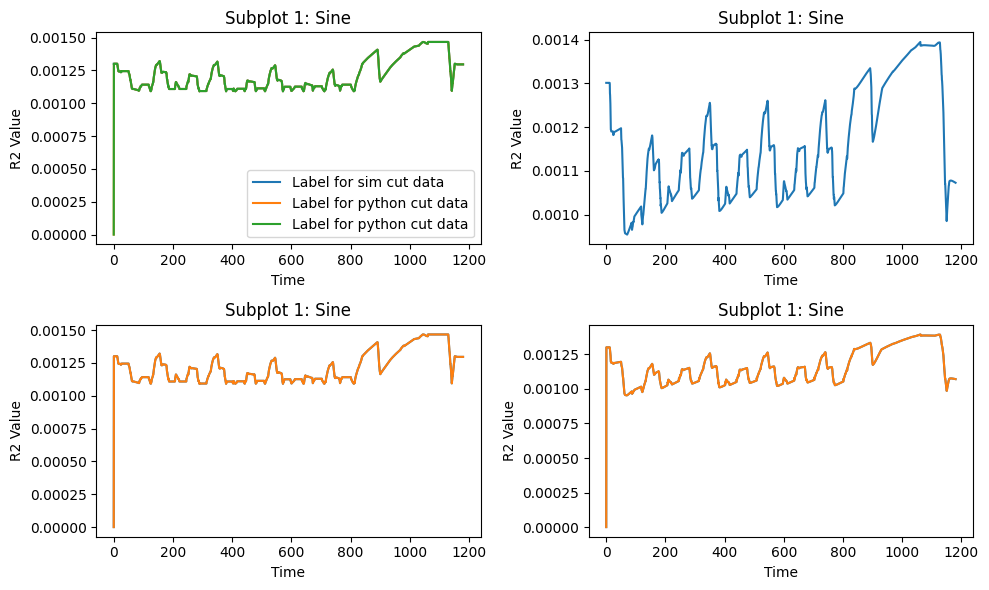

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x2 grid of subplots
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.subplot(2, 2, 1)
plt.plot(Zeit_sim_cut, R2_sim_cut, label='Label for sim cut data')
plt.plot(Zeit_python_cut, R2_python_cut, label='Label for python cut data')
plt.legend()
plt.title('Subplot 1: Sine')
plt.xlabel('Time')
plt.ylabel('R2 Value')


# Subplot 2
plt.subplot(2, 2, 2)
plt.plot(Zeit_sim_full, R2_sim_full)
plt.title('Subplot 1: Sine')
plt.xlabel('Time')
plt.ylabel('R2 Value')

# Subplot 3
plt.subplot(2, 2, 3)
plt.plot(Zeit_python_cut, R2_python_cut)
plt.title('Subplot 1: Sine')
plt.xlabel('Time')
plt.ylabel('R2 Value')

# Subplot 4
plt.subplot(2, 2, 4)
plt.plot(Zeit_python_full, R2_python_full)
plt.title('Subplot 1: Sine')
plt.xlabel('Time')
plt.ylabel('R2 Value')

# Add some spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
